<a href="https://colab.research.google.com/github/YAAANG1012/DeepLearning-Model/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [18]:
import pdb

Here we use MNIST as the dataset and we then write LeNet-5

In [19]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 works with 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Hyperparameters


In [20]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    #Layers definition
    #output = ((ip-kernelsize=2 padding)/stride) +1
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(400,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    #forward propagation
    x = F.relu(self.pool1(self.conv1(x)))
    x = F.relu(self.pool2(self.conv2(x)))
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = LeNet5()

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [22]:
#
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

Training Loop

Time taken for epoch 0 is 21.93 seconds
Time taken for epoch 1 is 22.14 seconds
Time taken for epoch 2 is 22.47 seconds
Time taken for epoch 3 is 22.25 seconds
Time taken for epoch 4 is 22.19 seconds
Time taken for epoch 5 is 21.33 seconds
Time taken for epoch 6 is 21.51 seconds
Time taken for epoch 7 is 21.72 seconds
Time taken for epoch 8 is 21.86 seconds
Time taken for epoch 9 is 21.69 seconds
Time taken for epoch 10 is 21.40 seconds
Time taken for epoch 11 is 21.87 seconds
Time taken for epoch 12 is 21.38 seconds
Time taken for epoch 13 is 20.86 seconds
Time taken for epoch 14 is 21.14 seconds
Time taken for epoch 15 is 20.99 seconds
Time taken for epoch 16 is 21.28 seconds
Time taken for epoch 17 is 20.58 seconds
Time taken for epoch 18 is 21.63 seconds
Time taken for epoch 19 is 21.40 seconds
Time taken for epoch 20 is 20.68 seconds
Time taken for epoch 21 is 21.20 seconds
Time taken for epoch 22 is 20.94 seconds
Time taken for epoch 23 is 21.60 seconds
Time taken for epoch 24 is

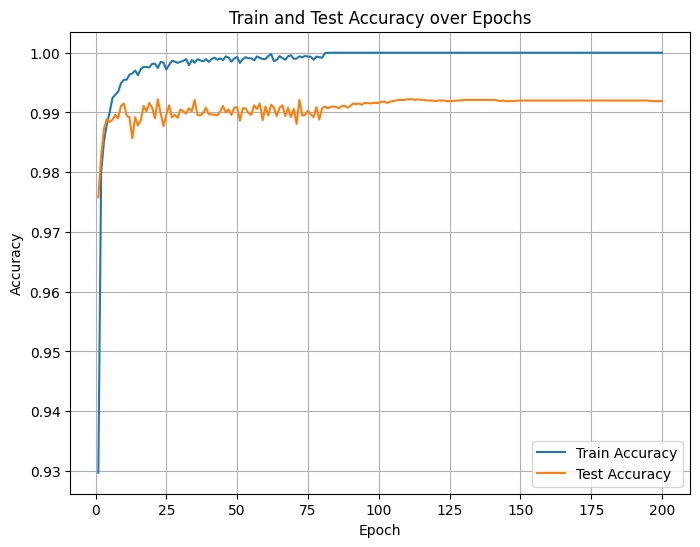

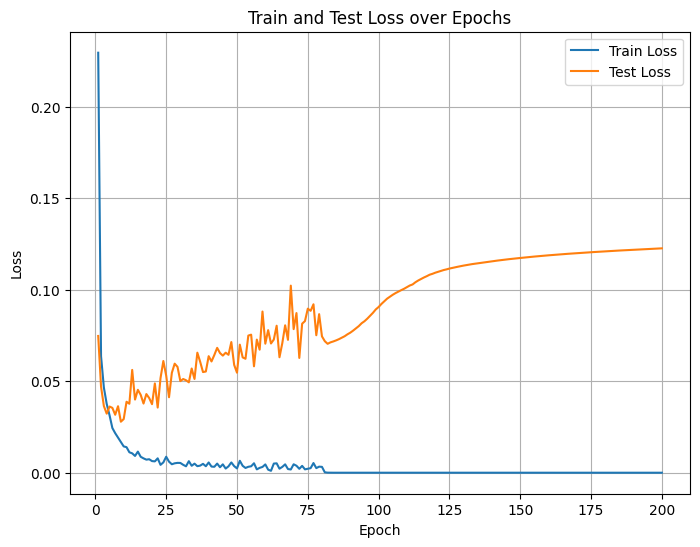

In [23]:
model = model.to(device)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
time_epoches = []
for epoch in range(200):
    start_time = time.time()
    loss_hist_train = 0
    accuracy_hist_train = 0
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        loss_hist_train += loss.item() * x_batch.size(0)
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (y_pred.argmax(dim=1) == y_batch).sum().item()
        accuracy_hist_train += is_correct
    accuracy_hist_train /= len(train_loader.dataset)
    loss_hist_train /= len(train_loader.dataset)
    #print(f'Train Metrics Epoch {epoch} Loss {loss_hist_train:.4f} Accuracy {accuracy_hist_train:.4f}')
    train_accuracies.append(accuracy_hist_train)
    train_losses.append(loss_hist_train)


    loss_hist_test = 0
    accuracy_hist_test = 0
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred_test = model(x_batch)
            loss = loss_fn(y_pred_test, y_batch)
            loss_hist_test += loss.item() * x_batch.size(0)
            is_correct = (y_pred_test.argmax(dim=1) == y_batch).sum().item()
            accuracy_hist_test += is_correct
    accuracy_hist_test /= len(test_loader.dataset)
    loss_hist_test /= len(test_loader.dataset)
    #print(f'Test Metrics Epoch {epoch} Loss {loss_hist_test:.4f} Accuracy {accuracy_hist_test:.4f}')
    test_accuracies.append(accuracy_hist_test)
    test_losses.append(loss_hist_test)

    end_time = time.time()
    print(f'Time taken for epoch {epoch} is {end_time - start_time:.2f} seconds')
    time_epoches.append(end_time - start_time)
#Plot_accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()
#Plot_losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [24]:
#save model
torch.save(model.state_dict(), "lenet5_mnist.pth")
print("Model parameters saved successfully!")

Model parameters saved successfully!


In [25]:
!ls

data  lenet5_mnist.pth	sample_data


In [26]:
from google.colab import files

files.download("lenet5_mnist.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from google.colab import drive
drive.mount('/content/drive')
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/LeNet/lenet5_mnist.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hand Written Number Test
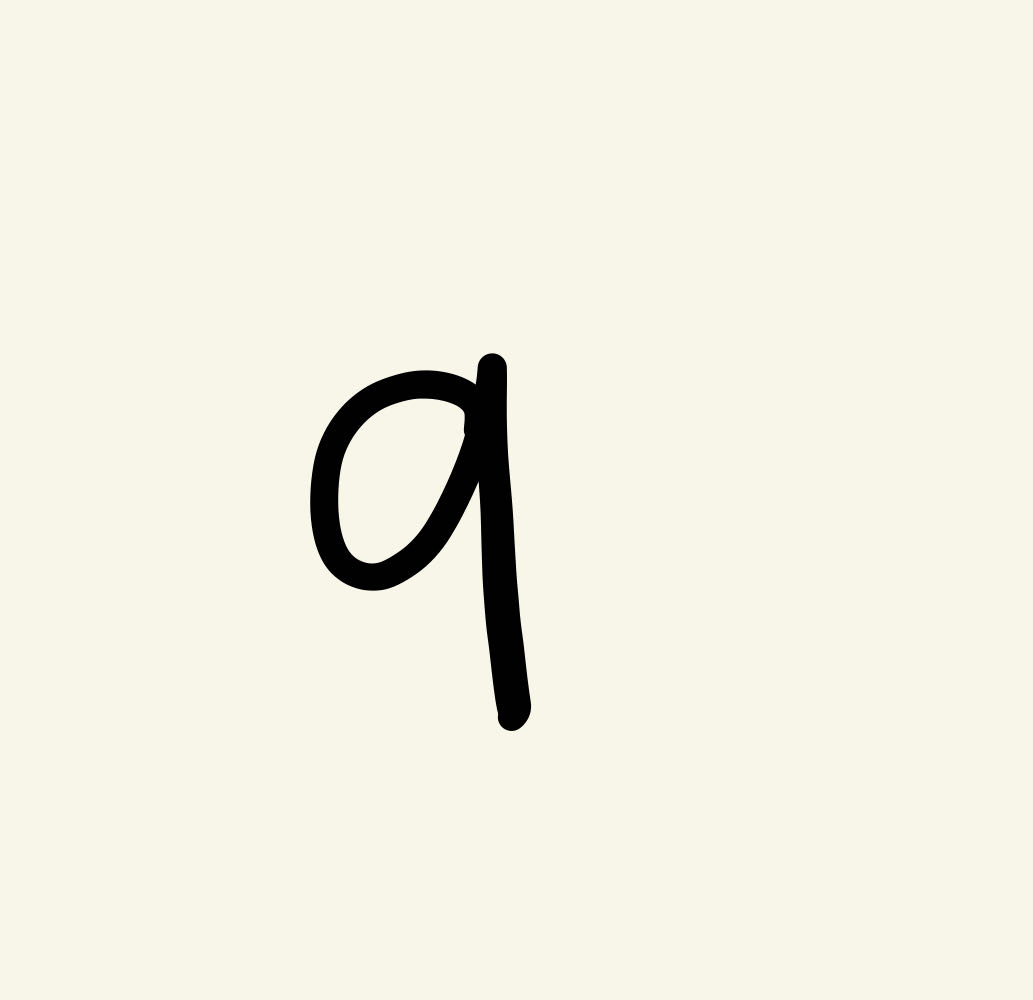

In [32]:
from PIL import Image
import torchvision.transforms as transforms

image_path = "/content/drive/My Drive/Colab Notebooks/LeNet/test_number.jpg"
#pre-processing
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

image = Image.open(image_path)
input_tensor = transform(image).unsqueeze(0)

In [33]:
input_tensor = input_tensor.to(device)

# Prediction
with torch.no_grad():
    output = model(input_tensor)

predicted_class = output.argmax(dim=1).item()

print(f"Predicted digit: {predicted_class}")


Predicted digit: 0


In [35]:
image_path = "/content/drive/My Drive/Colab Notebooks/LeNet/test_number_8.jpg"
#pre-processing
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

image = Image.open(image_path)
input_tensor = transform(image).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Prediction
with torch.no_grad():
    output = model(input_tensor)

predicted_class = output.argmax(dim=1).item()

print(f"Predicted digit: {predicted_class}")

Predicted digit: 8


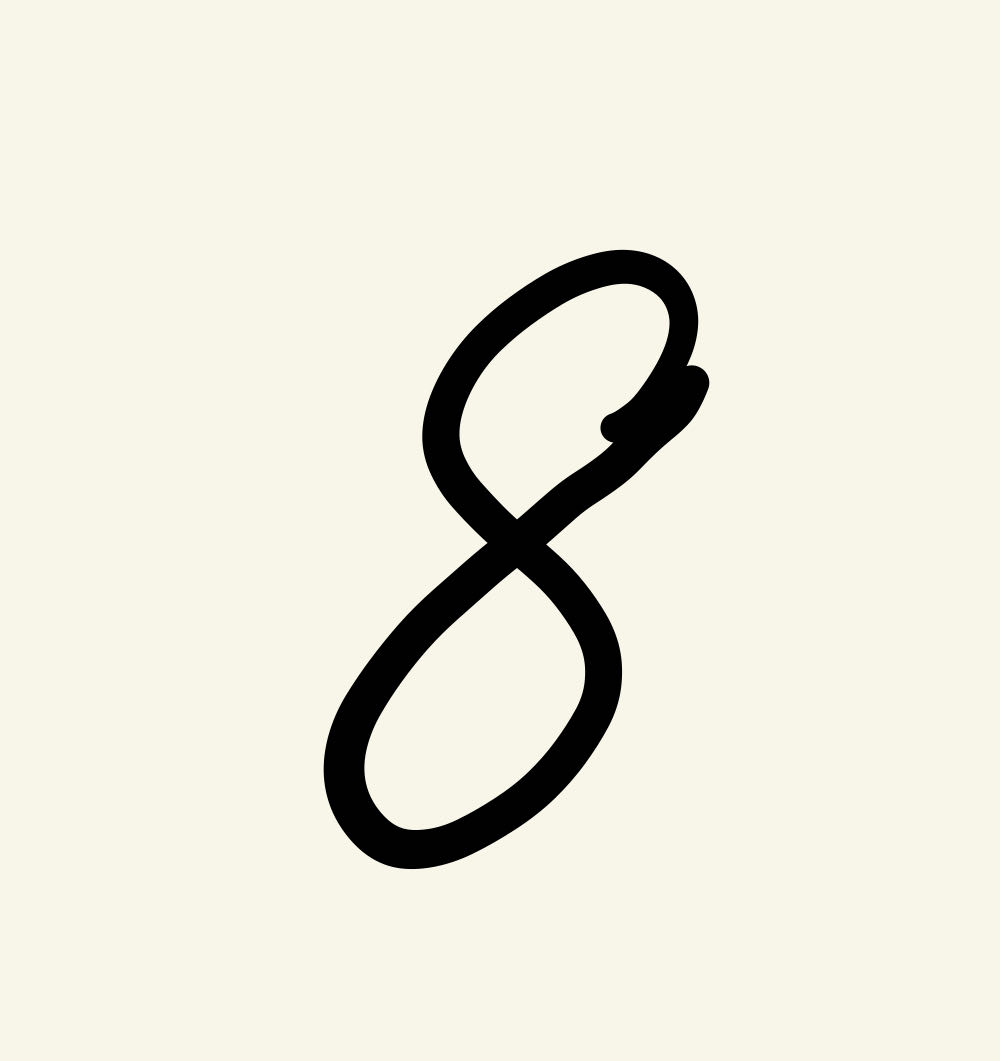

# How to overcome the effect of overfitting


*   Early stop
*   L2 penalty

We would try to introduce the l2 penalty to see how the model performance


In [37]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # LeNet-5 works with 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3,  weight_decay=1e-4)

In [39]:
print(device)

cuda


Time taken for epoch 0 is 22.04 seconds
Time taken for epoch 1 is 23.12 seconds
Time taken for epoch 2 is 21.45 seconds
Time taken for epoch 3 is 22.59 seconds
Time taken for epoch 4 is 22.31 seconds
Time taken for epoch 5 is 21.46 seconds
Time taken for epoch 6 is 21.88 seconds
Time taken for epoch 7 is 21.11 seconds
Time taken for epoch 8 is 21.28 seconds
Time taken for epoch 9 is 21.83 seconds
Time taken for epoch 10 is 21.16 seconds
Time taken for epoch 11 is 22.29 seconds
Time taken for epoch 12 is 21.98 seconds
Time taken for epoch 13 is 21.30 seconds
Time taken for epoch 14 is 22.36 seconds
Time taken for epoch 15 is 21.85 seconds
Time taken for epoch 16 is 21.29 seconds
Time taken for epoch 17 is 22.23 seconds
Time taken for epoch 18 is 20.76 seconds
Time taken for epoch 19 is 21.96 seconds
Time taken for epoch 20 is 22.31 seconds
Time taken for epoch 21 is 21.87 seconds
Time taken for epoch 22 is 22.63 seconds
Time taken for epoch 23 is 21.97 seconds
Time taken for epoch 24 is

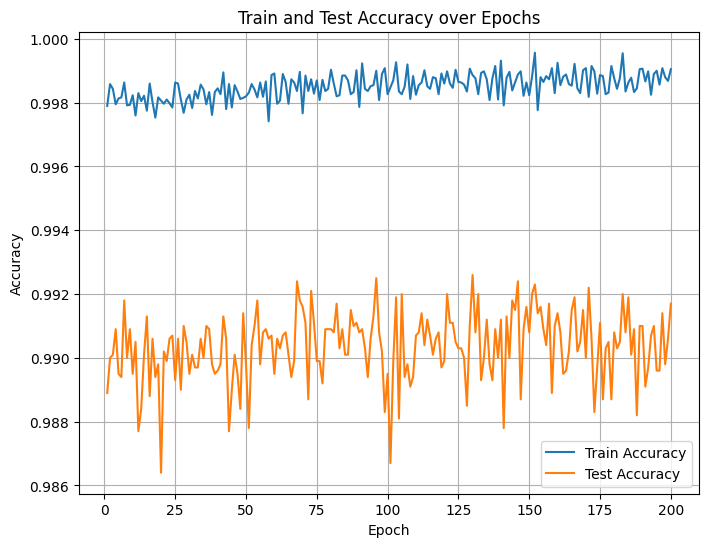

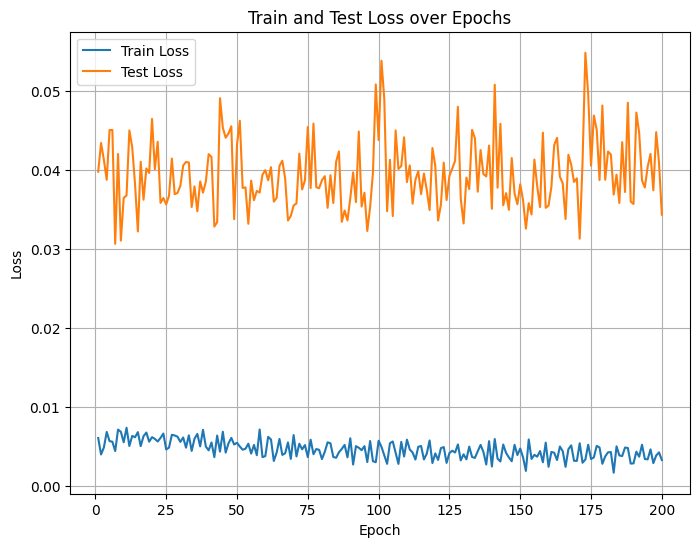

In [42]:
model = model.to(device)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
time_epoches = []
for epoch in range(200):
    start_time = time.time()
    loss_hist_train = 0
    accuracy_hist_train = 0
    model.train()
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        loss_hist_train += loss.item() * x_batch.size(0)
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (y_pred.argmax(dim=1) == y_batch).sum().item()
        accuracy_hist_train += is_correct
    accuracy_hist_train /= len(train_loader.dataset)
    loss_hist_train /= len(train_loader.dataset)
    #print(f'Train Metrics Epoch {epoch} Loss {loss_hist_train:.4f} Accuracy {accuracy_hist_train:.4f}')
    train_accuracies.append(accuracy_hist_train)
    train_losses.append(loss_hist_train)


    loss_hist_test = 0
    accuracy_hist_test = 0
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred_test = model(x_batch)
            loss = loss_fn(y_pred_test, y_batch)
            loss_hist_test += loss.item() * x_batch.size(0)
            is_correct = (y_pred_test.argmax(dim=1) == y_batch).sum().item()
            accuracy_hist_test += is_correct
    accuracy_hist_test /= len(test_loader.dataset)
    loss_hist_test /= len(test_loader.dataset)
    #print(f'Test Metrics Epoch {epoch} Loss {loss_hist_test:.4f} Accuracy {accuracy_hist_test:.4f}')
    test_accuracies.append(accuracy_hist_test)
    test_losses.append(loss_hist_test)

    end_time = time.time()
    print(f'Time taken for epoch {epoch} is {end_time - start_time:.2f} seconds')
    time_epoches.append(end_time - start_time)
#Plot_accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()
#Plot_losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [44]:
#save model
torch.save(model.state_dict(), "lenet5_mnist_l2.pth")

files.download("lenet5_mnist_l2.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
drive.mount('/content/drive')
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/LeNet/lenet5_mnist_l2.pth")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
image_path = "/content/drive/My Drive/Colab Notebooks/LeNet/test_number.jpg"
#pre-processing
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

image = Image.open(image_path)
input_tensor = transform(image).unsqueeze(0)
input_tensor = input_tensor.to(device)

# Prediction
with torch.no_grad():
    output = model(input_tensor)

predicted_class = output.argmax(dim=1).item()

print(f"Predicted digit: {predicted_class}")

Predicted digit: 4
